In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pycm

### Manually Creating GAN CF for models


In [19]:
convnext_gan = [[864,11,188,9,1,0,0],
[35,1129,57,2,8,1,0],
[17,7,1207,3,0,0,0],
[7,0,13,1117,1,0,0],
[3,5,21,30,1035,4,11],
[3,0,11,2,3,1055,0],
[3,0,11,5,0,0,1060]]

efficientnet_gan = [[1016,16,21,6,1,3,10],
[34,1167,7,8,7,8,1],
[59,14,1150,1,3,2,2],
[10,1,3,1117,2,4,1],
[2,9,2,6,1088,1,1],
[1,1,0,1,3,1068,0],
[1,0,0,0,0,0,1078]]

resnet_gan = [[991,24,50,6,0,0,2],
 [34,1170,11,9,7,1,0],
 [57,21,1147,5,4,0,0],
 [10,4,3,1118,3,0,0],
 [5,8,4,4,1086,0,2],
 [4,4,0,0,6,1060,0],
 [3,0,1,0,0,0,1075]]

vit_gan = [[968,25,71,6,0,0,3],
          [54,1108,52,2,12,0,4],
          [49,14,1160,1,7,0,3],
          [18,15,13,1084,2,0,6],
          [8,19,20,5,1051,4,2],
          [3,6,5,4,27,1029,0],
          [2,0,3,4,9,0,1061]]

In [20]:
np.save('../output_files/cf_matrix/ConvNeXt_GAN_2Fold.npy', convnext_gan)
np.save('../output_files/cf_matrix/Efficientnet_GAN_2Fold.npy', efficientnet_gan)
np.save('../output_files/cf_matrix/ViT_GAN_2Fold.npy', vit_gan)
np.save('../output_files/cf_matrix/Resnet_GAN_2Fold.npy', resnet_gan)

### Manually Creating Augmented CF for model

In [7]:
convnext_augmented = [[1323,4,10,3,0,1,0],
[42,1279,18,2,0,1,0],
[78,42,1216,0,5,1,0],
[2,6,3,1330,2,0,0],
[0,2,0,1,1338,0,0],
[0,0,0,0,0,1346,0],
[0,0,0,0,0,0,1345]]

resnet_augmented = [[1320,4,10,3,0,1,0],
[42,1270,23,6,0,1,0],
[79,42,1216,0,5,1,0],
[2,6,3,1330,2,0,0],
[0,2,0,1,1338,0,0],
[0,0,0,0,0,1346,0],
[0,0,0,0,0,0,1345]]

In [3]:
efficientnet_augmented = [[1325,4,10,1,0,1,0],
[48,1284,5,3,1,1,0],
[96,19,1222,3,1,1,0],
[1,0,0,1342,0,0,0],
[1,1,0,0,1338,1,0],
[2,0,0,0,0,1332,12],
[0,0,1,0,0,0,1344]]

In [4]:
vit_augmented = [[1085,98,96,29,12,7,7],
[107,1162,23,28,12,2,3],
[323,76,1024,6,14,1,9],
[10,22,6,1289,12,1,3],
[8,22,8,8,1294,0,1],
[1,2,0,0,0,1343,0],
[0,0,0,0,0,1,1344]]

In [8]:
np.save('../output_files/cf_matrix/ConvNeXt_Augmented_2Fold.npy', convnext_augmented)
np.save('../output_files/cf_matrix/Efficientnet_Augmented_2Fold.npy', efficientnet_augmented)
np.save('../output_files/cf_matrix/ViT_Augmented_2Fold.npy', vit_augmented)
np.save('../output_files/cf_matrix/Resnet_Augmented_2Fold.npy', resnet_augmented)

### Loading for NumPy Array

In [3]:


vit_original = np.load(f'../output_files/pycm/VisionTransformer_original_finetune_fold4.npy')
resnet_original = np.load(f'../output_files/pycm/ResNet_original_finetune_fold4.npy')
convnext_original = np.load(f'../output_files/pycm/ConvNeXt_original_transfer_fold4.npy')
efficientnet_original = np.load(f'../output_files/pycm/EfficientNet_original_finetune_fold4.npy')


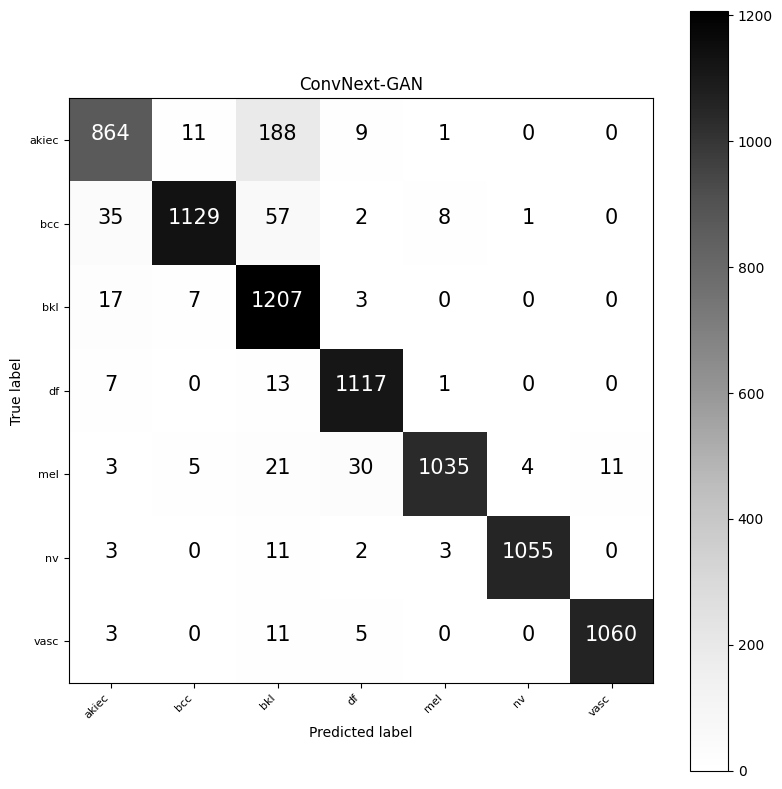

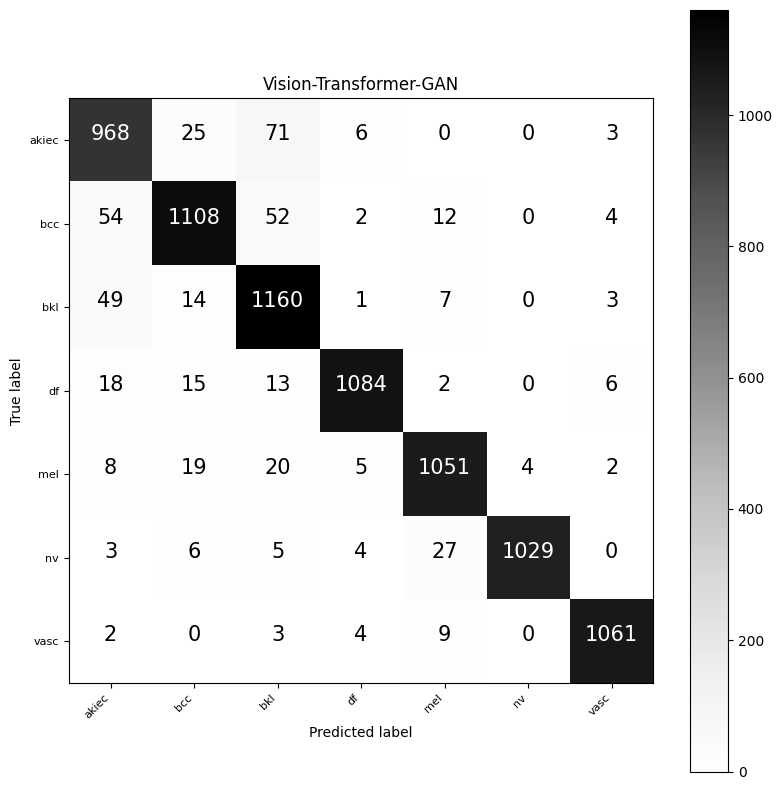

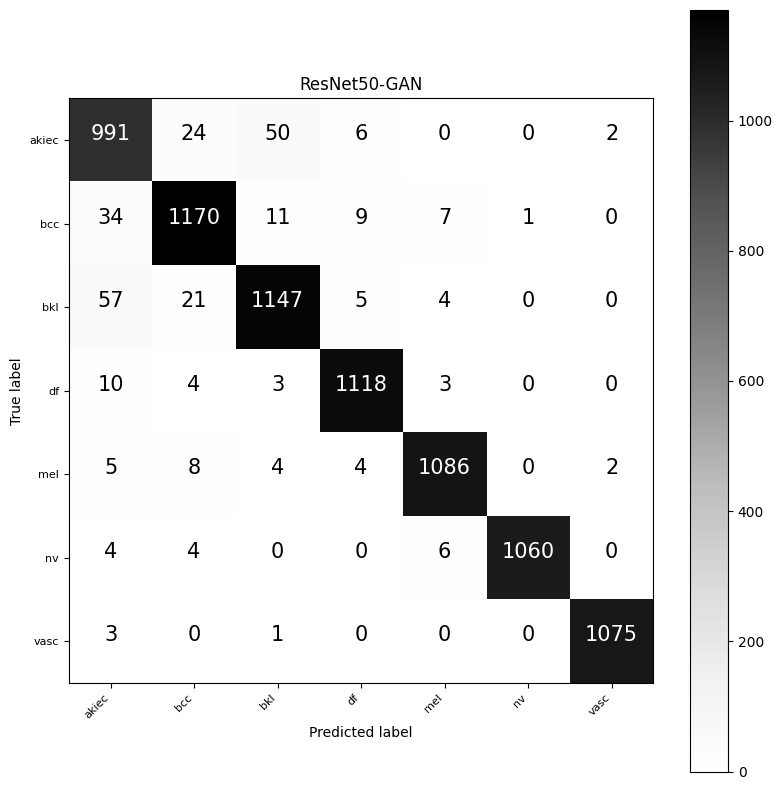

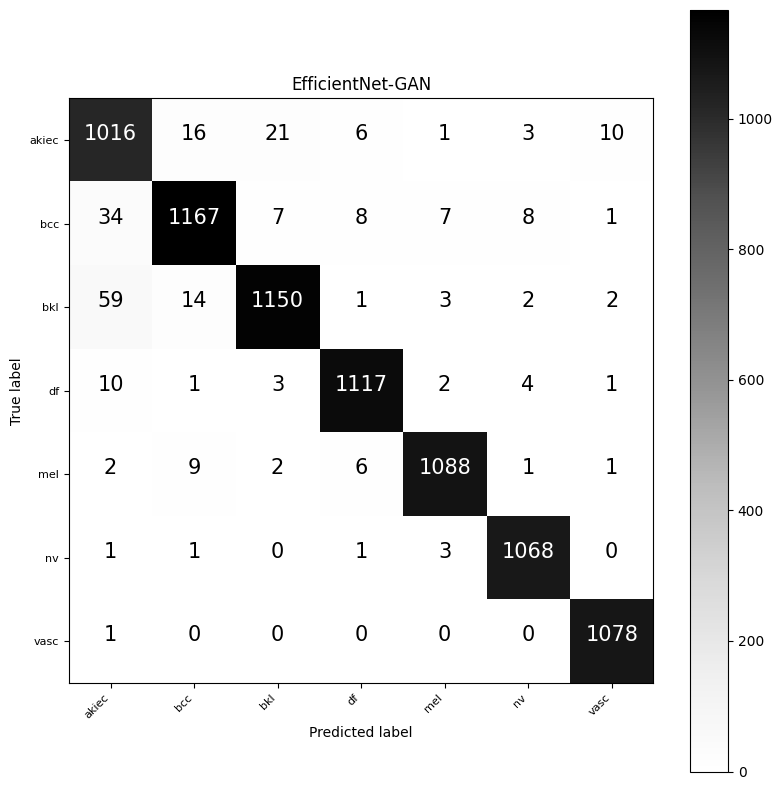

In [24]:
plot_confusion_matrix(np.asarray(convnext_gan), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'ConvNext-GAN')
plot_confusion_matrix(np.asarray(vit_gan), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'Vision-Transformer-GAN')
plot_confusion_matrix(np.asarray(resnet_gan), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'ResNet50-GAN')
plot_confusion_matrix(np.asarray(efficientnet_gan), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'EfficientNet-GAN')

In [21]:

def plot_confusion_matrix(cm, class_names, cls):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
    plt.title(cls)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, fontsize=8, horizontalalignment='right')
    plt.yticks(tick_marks, class_names, fontsize=8)

    # Normalize the confusion matrix.
    # cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color, fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'../output_files/{cls}_CF.png')
    # return figure


# plot_confusion_matrix(np.asarray(convnext_augmented), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'ConvNext-Augmented')
# plot_confusion_matrix(np.asarray(vit_augmented), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'Vision-Transformer-Augmented')
# plot_confusion_matrix(np.asarray(resnet_augmented), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'ResNet50-Augmented')
# plot_confusion_matrix(np.asarray(efficientnet_augmented), ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], 'EfficientNet-Augmented')


Text(0.5, 82.61301859440258, 'Predicted label')

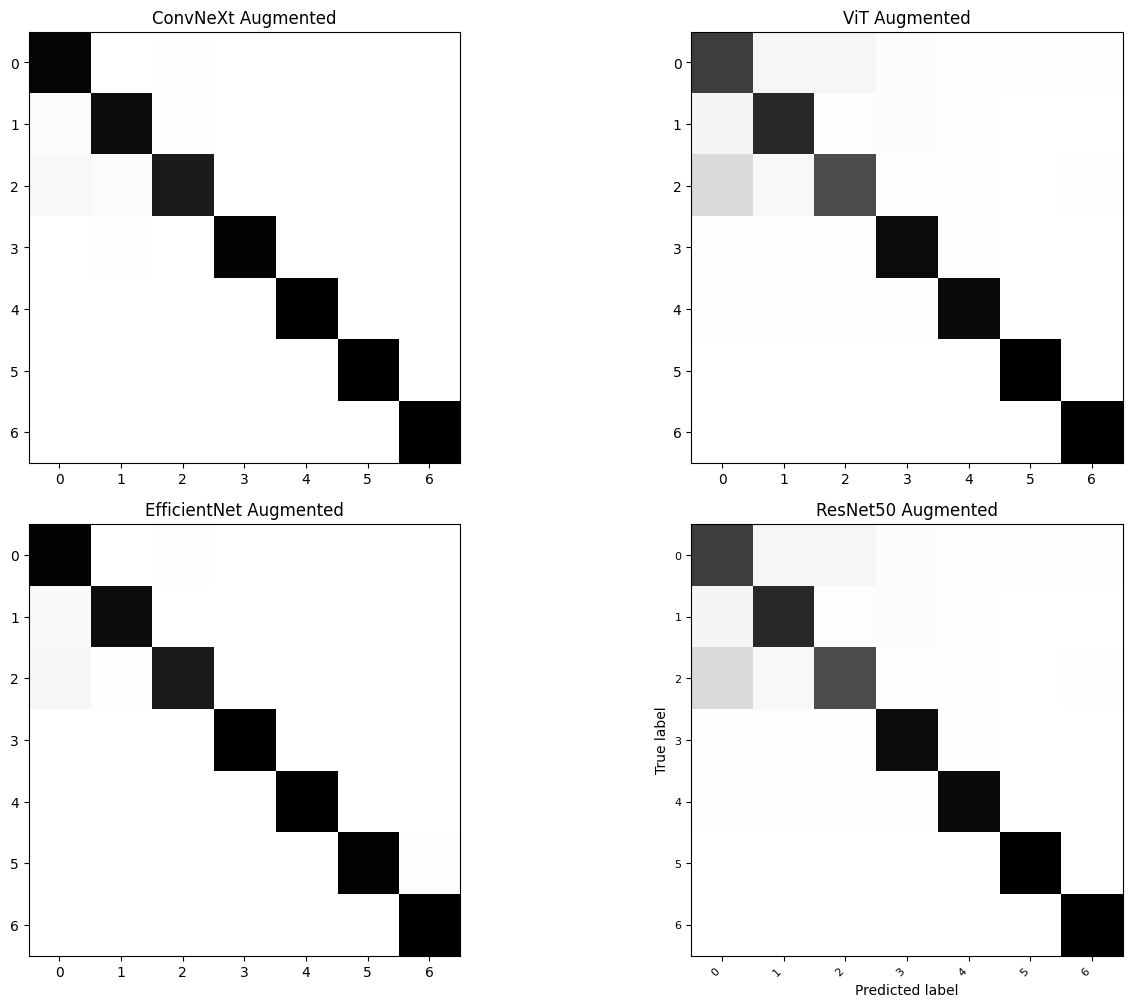

In [82]:
import numpy as np
import itertools
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(np.asarray(vit_augmented), [0,1,2,3,4,5,6,7])


# clss = [efficientnet_augmented, convnext_augmented, vit_augmented, vit_augmented]
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# for cls, ax in zip(range(0,4), range(0,4)):
#     ax.imshow(np.asarray(clss[cls]))
#     # ax.title.set_text(type(cls).__name__)
# plt.tight_layout()  
# plt.show()

# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# ax[0][0] = plot_confusion_matrix(np.asarray(vit_augmented), [0,1,2,3,4,5,6,7])
# ax[0][1] = plot_confusion_matrix(np.asarray(vit_augmented), [0,1,2,3,4,5,6,7])
# ax[1][0] = plot_confusion_matrix(np.asarray(vit_augmented), [0,1,2,3,4,5,6,7])
# ax[1][1] = plot_confusion_matrix(np.asarray(vit_augmented), [0,1,2,3,4,5,6,7])

# def plot(cm, cls):
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
#     # plt.colorbar()

# ax[0,0].imshow(np.asarray(convnext_augmented))
# ax[0,1].imshow(np.asarray(vit_augmented))
# ax[1,0].imshow(np.asarray(vit_augmented))
# ax[1,1].imshow(np.asarray(vit_augmented))
# plt.show()
class_names = [0,1,2,3,4,5,6]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax[0,0].imshow(np.asarray(convnext_augmented), cmap=plt.cm.Greys)
ax[0,0].set_title('ConvNeXt Augmented')
ax[0,1].imshow(np.asarray(vit_augmented), cmap=plt.cm.Greys)
ax[0,1].set_title('ViT Augmented')
ax[1,0].imshow(np.asarray(efficientnet_augmented), cmap=plt.cm.Greys)
ax[1,0].set_title('EfficientNet Augmented')
ax[1,1].imshow(np.asarray(vit_augmented), cmap=plt.cm.Greys)
ax[1,1].set_title('ResNet50 Augmented')

# plt.title("Confusion matrix")
# plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, fontsize=8, horizontalalignment='right')
plt.yticks(tick_marks, class_names, fontsize=8)

# Normalize the confusion matrix.
# cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# Use white text if squares are dark; otherwise black.
# threshold = cm.max() / 2.

# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     color = "white" if cm[i, j] > threshold else "black"
#     plt.text(j, i, cm[i, j], horizontalalignment="center", color=color, fontsize=7)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')



In [10]:
vit_original = np.load(f'../output_files/pycm/VisionTransformer_original_finetune_fold4.npy')
resnet_original = np.load(f'../output_files/pycm/ResNet_original_finetune_fold4.npy')
convnext_original = np.load(f'../output_files/pycm/ConvNeXt_original_transfer_fold4.npy')
efficientnet_original = np.load(f'../output_files/pycm/EfficientNet_original_finetune_fold4.npy')

convnext_augmented = np.load('../output_files/pycm/ConvNeXt_Augmented_2Fold.npy')
efficientnet_augmented = np.load('../output_files/pycm/Efficientnet_Augmented_2Fold.npy')
vit_augmented = np.load('../output_files/pycm/ViT_Augmented_2Fold.npy')
resnet_augmented = np.load('../output_files/pycm/Resnet_Augmented_2Fold.npy')

convnext_gan = np.load('../output_files/pycm/ConvNeXt_GAN_2Fold.npy')
efficientnet_gan = np.load('../output_files/pycm/Efficientnet_GAN_2Fold.npy')
vit_gan = np.load('../output_files/pycm/ViT_GAN_2Fold.npy')
resnet_gan = np.load('../output_files/pycm/Resnet_GAN_2Fold.npy')

In [56]:
metrics = ['F1-Score', 'Precision', 'Recall', 'AUC' ]

conv_org_cf = pycm.ConfusionMatrix(matrix=convnext_original)
res_org_cf = pycm.ConfusionMatrix(matrix=resnet_original)
eff_org_cf = pycm.ConfusionMatrix(matrix=efficientnet_original)
vit_org_cf = pycm.ConfusionMatrix(matrix=vit_original)

conv_aug_cf = pycm.ConfusionMatrix(matrix=convnext_augmented)
res_aug_cf = pycm.ConfusionMatrix(matrix=resnet_augmented)
eff_aug_cf = pycm.ConfusionMatrix(matrix=efficientnet_augmented)
vit_aug_cf = pycm.ConfusionMatrix(matrix=vit_augmented)

conv_gan_cf = pycm.ConfusionMatrix(matrix=convnext_gan)
res_gan_cf = pycm.ConfusionMatrix(matrix=resnet_gan)
eff_gan_cf = pycm.ConfusionMatrix(matrix=efficientnet_gan)
vit_gan_cf = pycm.ConfusionMatrix(matrix=vit_gan)


# model = conv_org_cf
# print(f'Convnext Orginal ')
# print(f"F1: {conv_org_cf.overall_stat['F1 Macro']}, Precision : {conv_org_cf.overall_stat['PPV Macro']}, Recall : {conv_org_cf.overall_stat['TPR Macro']}")

def model_metrics(name , model):
    print(f'{name}')
    auc = sum(model.class_stat['AUC'].values())/len(model.class_stat['AUC'])
    print(f"F1: {model.overall_stat['F1 Macro']}, Precision : {model.overall_stat['PPV Macro']}, Recall : {model.overall_stat['TPR Macro']}, AUC: {auc}, avgACC : {model.overall_stat['Overall ACC']} ")
    

# Original Models
model_metrics('ConvNeXt Original', conv_org_cf)
model_metrics('Resnet Original', res_org_cf)
model_metrics('EfficientNet Original',eff_org_cf)
model_metrics('Vision Transformer Original',vit_org_cf)

print('====================================================================================================')

model_metrics('ConvNeXt Augmented', conv_aug_cf)
model_metrics('Resnet Augmented', res_aug_cf)
model_metrics('EfficientNet Augmented',eff_aug_cf)
model_metrics('Vision Transformer Augmented',vit_aug_cf)

print('====================================================================================================')

model_metrics('ConvNeXt GAN', conv_gan_cf)
model_metrics('Resnet GAN', res_gan_cf)
model_metrics('EfficientNet GAN',eff_gan_cf)
model_metrics('Vision Transformer GAN',vit_gan_cf)


ConvNeXt Original
F1: 0.711941854275436, Precision : 0.7539787134653865, Recall : 0.6900665360851924, AUC: 0.8249798445076867, avgACC : 0.8482276585122317 
Resnet Original
F1: 0.7237751064084854, Precision : 0.7508279560770111, Recall : 0.7033240108528228, AUC: 0.829656058547869, avgACC : 0.8472291562656016 
EfficientNet Original
F1: 0.7377288956353291, Precision : 0.7709091153560517, Recall : 0.728951069251855, AUC: 0.8416276372583312, avgACC : 0.8582126809785322 
Vision Transformer Original
F1: 0.5097599427647019, Precision : 0.5197099746957872, Recall : 0.5107349656150422, AUC: 0.7238588687028856, avgACC : 0.7603594608087868 
ConvNeXt Augmented
F1: 0.9762058389213042, Precision : 0.9768973992955585, Recall : 0.9762608068837597, AUC: 0.9861537854607415, avgACC : 0.9762765957446808 
Resnet Augmented
F1: 0.975116460227621, Precision : 0.97576148651351, Recall : 0.9752020646618776, AUC: 0.9855356215452044, avgACC : 0.9752074909555225 
EfficientNet Augmented
F1: 0.9773860302122953, Preci

c:\Users\tanve\.virtualenvs\SkinCancer\lib\site-packages\pycm\pycm_class_func.py:324: RuntimeWarning: divide by zero encountered in double_scalars
  result = item1 / item2
c:\Users\tanve\.virtualenvs\SkinCancer\lib\site-packages\pycm\pycm_class_func.py:589: RuntimeWarning: divide by zero encountered in double_scalars
  X = TPR / (1 - TPR)
c:\Users\tanve\.virtualenvs\SkinCancer\lib\site-packages\pycm\pycm_class_func.py:192: RuntimeWarning: divide by zero encountered in longlong_scalars
  OR = (TP * TN) / (FP * FN)
c:\Users\tanve\.virtualenvs\SkinCancer\lib\site-packages\pycm\pycm_class_func.py:193: RuntimeWarning: invalid value encountered in double_scalars
  result = (OR - 1) / (OR + 1)
c:\Users\tanve\.virtualenvs\SkinCancer\lib\site-packages\pycm\pycm_class_func.py:290: RuntimeWarning: overflow encountered in long_scalars
  (math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)))
c:\Users\tanve\.virtualenvs\SkinCancer\lib\site-packages\pycm\pycm_class_func.py:192: RuntimeWarning: di

In [55]:
def average(diction):
    avgDict = {}
    for k, v in diction.items():
        # v is the list of grades for student k
         avgDict[k] = sum(v)/ float(len(v))
    return avgDict
print(conv_gan_cf.class_stat['AUC'])

# average(conv_gan_cf.class_stat['AUC'])

avg = sum(conv_gan_cf.class_stat['AUC'].values())/len(conv_gan_cf.class_stat['AUC'])
avg

{0: 0.8976575689765118, 1: 0.9564834254384351, 2: 0.9666140317163345, 3: 0.9870238378569883, 4: 0.9656849258099907, 5: 0.9907903963238894, 6: 0.9903938021653782}


0.9649497126125041